In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
scale = 133.322

In [4]:
valve_data = np.loadtxt("../data/Ventildaten.dat", skiprows=1)
valve_pos = valve_data[:,0]
flow = valve_data[:,1] * 100

In [5]:
pressure_data_lu = np.loadtxt("../data/Luft2.txt", skiprows=1)
pressure_data_he = np.loadtxt("../data/Helium2.txt", skiprows=1)

In [10]:
def plot(valve_pos_measure, pressure, label, fit_range, ax):
    flow_measure = np.interp(valve_pos_measure, valve_pos, flow)
    fit_params, cov = np.polyfit(pressure[fit_range[0]:fit_range[1]], flow_measure[fit_range[0]:fit_range[1]], 1, cov=True)
    print(np.sqrt(np.diag(cov)))
    fit_function = np.poly1d(fit_params)
    ps = np.linspace(np.min(pressure[fit_range[0]:fit_range[1]]), np.max(pressure[fit_range[0]:fit_range[1]]), 100)
    ax.scatter(pressure, flow_measure, label=label)
    ax.plot(ps, fit_function(ps), label =f"$F(p) = p \\cdot {fit_params[0]:.2} \\mathrm{{l}}/\\mathrm{{s}} + {fit_params[1]:.3}\\mathrm{{l}}$")


[0.03441362 3.73370675]
[0.00308696 0.34775549]


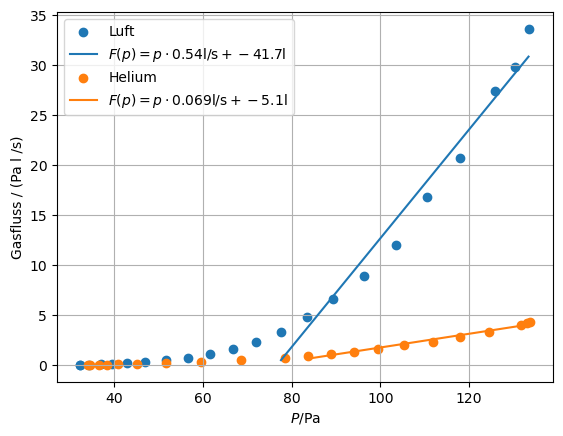

In [11]:
fig, ax = plt.subplots()
plot(pressure_data_lu[:, 0], pressure_data_lu[:, 2] * scale, "Luft", [0,10], ax)
plot(pressure_data_he[:, 0], pressure_data_he[:, 2] * scale, "Helium", [0,11], ax)
ax.set(ylabel="Gasfluss / (Pa l /s)", xlabel="$P / \\mathrm{Pa}$")

ax.legend()
ax.grid()

fig.savefig('../out/drehschieber.png')

In [12]:
pressure_data_lu_turbo = np.genfromtxt("../data/Luft3.txt", delimiter="\t", skip_header=1)
pressure_data_he_turbo = np.genfromtxt("../data/Helium3.txt", delimiter="\t", skip_header=1)

[0.42967728 1.62923889]
[0.00882235 0.21435448]


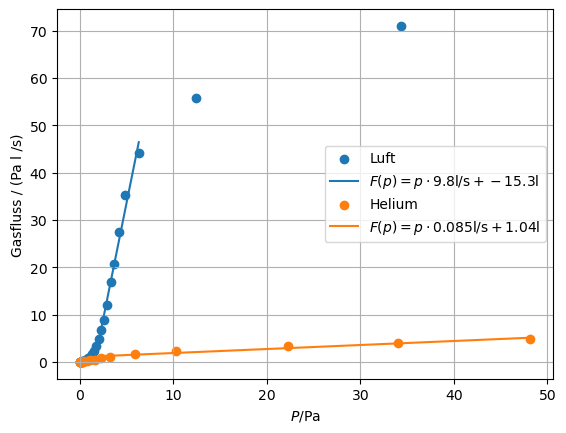

In [13]:
fig1, ax1 = plt.subplots()
plot(pressure_data_lu_turbo[:, 0], pressure_data_lu_turbo[:, 3] * scale, "Luft", [2,11], ax1)
plot(pressure_data_he_turbo[:, 0], pressure_data_he_turbo[:, 3] * scale, "Helium", [12,19], ax1)
ax1.set(ylabel="Gasfluss / (Pa l /s)", xlabel="$P / \\mathrm{Pa}$")
ax1.legend()
ax1.grid()

fig1.savefig('../out/turbomolekular.png')